# Adding all relevant imports and tables


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link" # brands.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)


# Changing date types to Datetime

In [3]:
orders.created_date = pd.to_datetime(orders['created_date'])
orderlines.date = pd.to_datetime(orderlines['date'])

# Cleaning Products Table



Deleting of duplicate rows & missing values in 'price'

In [4]:
products.info()                # Check: how many rows in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [5]:
products_cl = products.copy()
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [6]:
products_cl.duplicated().sum()          # Check: how many duplicated rows in the table


8746

In [7]:
products_cl.drop_duplicates(inplace = True)           # Drop duplicated rows
products_cl.duplicated().sum()                        # Check: how many duplicated rows

0

In [8]:
products_cl.info()                  # Check: how many rows in the table?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [9]:
products_cl.price.isna().value_counts(normalize=True)*100          # Check: percentage of missing values in 'price'

False    99.565217
True      0.434783
Name: price, dtype: float64

In [10]:
products_cl = products_cl.loc[~products_cl.price.isna(), :]               # Delete rows with missing values in price
products_cl.info()                                                        # Check: how many rows in the table?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10527 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


Issues with 'price'

In [11]:
problems_number_products = products_cl.loc[(products_cl.price.str.contains("\d+\.\d+\.\d+")) | (products_cl.price.str.contains("\d+\.\d{3,}")), :].shape[0]           # Check: how many cells contain prices with two dots & 3 decimals
problems_number_products

542

In [12]:
products_cl = products_cl.loc[(~products_cl.price.astype(str).str.contains("\d+\.\d+\.\d+")) & (~products_cl.price.astype(str).str.contains("\d+\.\d{3,}")),:]          # Delete cels with two dots & three decimals
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          9992 non-null   object
 1   name         9992 non-null   object
 2   desc         9986 non-null   object
 3   price        9992 non-null   object
 4   promo_price  9992 non-null   object
 5   in_stock     9992 non-null   int64 
 6   type         9946 non-null   object
dtypes: int64(1), object(6)
memory usage: 624.5+ KB


In [13]:
products_cl.price = pd.to_numeric(products_cl.price)                # Convert price to float
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.5+ KB


In [14]:
print(len(products_cl))
print(products_cl['sku'].str.len())


9992
0        7
1        7
2        7
3        7
4        7
        ..
19321    7
19322    7
19323    7
19324    7
19325    7
Name: sku, Length: 9992, dtype: int64


In [15]:
products_cl["short_brand"] = products_cl["sku"].str[:3]
products_cl

,sku,name,desc,price,promo_price,in_stock,type,short_brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,KIN
...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,BEL
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,THU


Add categories

In [16]:
category_type_df = products_cl.copy()

In [17]:
category_type_df["category"] = ""

category_type_df.loc[(category_type_df["type"] == "11865403") | (category_type_df["type"] == "12635403") , "category"] = "Phone Cases"
category_type_df.loc[category_type_df["type"] == "12175397", "category"] = "Servers"
category_type_df.loc[category_type_df["type"] == "11935397", "category"] = "External Storage"
category_type_df.loc[(category_type_df["type"] == "1282") | (category_type_df["type"] == "5,74E+15") | (category_type_df["type"] == "1,02E+12") | (category_type_df["type"] == "2158") | (category_type_df["type"] == "118692158") , "category"] = "MacBook, iMac"
category_type_df.loc[category_type_df["type"] == "13835403", "category"] = "MacBook Cases"
category_type_df.loc[category_type_df["type"] == "1364", "category"] = "Memory"
category_type_df.loc[category_type_df["type"] == "12585395", "category"] = "Port, Adapter"
category_type_df.loc[category_type_df["type"] == "1296", "category"] = "Monitor"
category_type_df.loc[category_type_df["type"] == "1325", "category"] = "Cable"
category_type_df.loc[category_type_df["type"] == "5383", "category"] = "Headphones, Headsets"
category_type_df.loc[(category_type_df["type"] == "1433") | (category_type_df["type"] == "12215397"), "category"] = "SSD"
category_type_df.loc[category_type_df["type"] == "5398", "category"] = "Speaker"
category_type_df.loc[category_type_df["type"] == "1,44E+11", "category"] = "Repair Service"
category_type_df.loc[category_type_df["type"] == "57445397", "category"] = "Memory Card, PenDrive"
category_type_df.loc[category_type_df["type"] == "1334", "category"] = "Router, Switch, Repeater"
category_type_df.loc[category_type_df["type"] == "2449", "category"] = "Smartwatch Accessoires"
category_type_df.loc[category_type_df["type"] == "12655397", "category"] = "Internal Storage"
category_type_df.loc[category_type_df["type"] == "1229", "category"] = "Pointer"
category_type_df.loc[category_type_df["type"] == "12995397", "category"] = "Docking Station"
category_type_df.loc[category_type_df["type"] == "1515", "category"] = "External Battery"
category_type_df.loc[category_type_df["type"] == "13615399", "category"] = "Charger"
category_type_df.loc[category_type_df["type"] == "13615399", "category"] = "Screen Saver"
category_type_df.loc[category_type_df["type"] == "1405", "category"] = "Graphic Tablet"
category_type_df.loc[category_type_df["type"] == "1230", "category"] = "Lightning to USB Cable"
category_type_df.loc[(category_type_df["type"] == "24885185") | (category_type_df["type"] == "24895185"), "category"] = "Smartwatch"
category_type_df.loc[category_type_df["type"] == "21485407", "category"] = "Spare Parts"
category_type_df.loc[category_type_df["type"] == "1392", "category"] = "Bag, Backpack"
category_type_df.loc[category_type_df["type"] == "11821715", "category"] = "iPod"
category_type_df.loc[category_type_df["type"] == "9094", "category"] = "Surveillance, Security Camera"
category_type_df.loc[(category_type_df["type"] == "85651716") | (category_type_df["type"] == "113271716") | (category_type_df["type"] == "113281716") | (category_type_df["type"] == "113291716") | (category_type_df["type"] == "13615399") | (category_type_df["type"] == "1716") | (category_type_df["type"] == "21561716") | (category_type_df["type"] == "51601716"), "category"] = "Smartphone"
category_type_df.loc[(category_type_df["type"] == "12575403") | (category_type_df["type"] == "13855401"), "category"] = "Keyboard"
category_type_df.loc[category_type_df["type"] == "1298", "category"] = "Need to be categorised"

category_type_df.loc[category_type_df["category"] == "", "category"] = "Others"

In [18]:
category_type_df["category"].value_counts()

Others                           2144
Phone Cases                      1419
Servers                           939
MacBook, iMac                     929
Need to be categorised            783
External Storage                  562
SSD                               341
MacBook Cases                     269
Smartphone                        225
Memory                            216
Port, Adapter                     190
Monitor                           187
Cable                             183
Speaker                           159
Smartwatch                        134
Memory Card, PenDrive             129
Repair Service                    129
Router, Switch, Repeater          115
Smartwatch Accessoires            107
Internal Storage                  105
Pointer                           104
Docking Station                    95
External Battery                   85
Graphic Tablet                     75
Lightning to USB Cable             73
Spare Parts                        66
Bag, Backpac

In [19]:
category_type_df.head(10)

,sku,name,desc,price,promo_price,in_stock,type,short_brand,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,RAI,Others
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,APP,Keyboard
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,APP,Others
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,APP,Lightning to USB Cable
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,KIN,Memory
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,420.003,0,1230,APP,Lightning to USB Cable
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,146.471,0,1364,KIN,Memory
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,274.694,0,1364,KIN,Memory
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74.00,669.904,0,1364,KIN,Memory
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35.00,330.003,0,1325,APP,Cable


# Cleaning Orderlines table

In [20]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [21]:
orderlines_cl = orderlines.copy()
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [22]:
two_dot_order_ids_list = orderlines_cl.loc[orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]                        # Delete unit_price with two dots
orderlines_cl = orderlines_cl.loc[~orderlines_cl.id_order.isin(two_dot_order_ids_list)]

orderlines_cl.unit_price = pd.to_numeric(orderlines_cl.unit_price)                                                                              # Convert unit price to float
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


<ipython-input-22-eb01c66ac761>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_cl.unit_price = pd.to_numeric(orderlines_cl.unit_price)                                                                              # Convert unit price to float


In [23]:
# orderlines_cl = orderlines_cl.rename(columns={'id_order': 'order_id'})

# Cleaning Orders table

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [25]:
orders_cl = orders.copy()
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [26]:
orders_cl = orders_cl.loc[~orders_cl.total_paid.isna(), :]                  # Delete rows with NaNs in total_paid
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.7+ MB


In [27]:
orders_cl.nunique()

order_id        226904
created_date    224823
total_paid       31236
state                5
dtype: int64

In [28]:
orders_cl.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

In [29]:
orders_cl = orders_cl.loc[~((orders_cl.state == 'Shopping Basket') | (orders_cl.state == 'Cancelled') | (orders_cl.state == 'Pending') | (orders_cl.state == 'Place Order'))]
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46605 non-null  int64         
 1   created_date  46605 non-null  datetime64[ns]
 2   total_paid    46605 non-null  float64       
 3   state         46605 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


# Cleaning Brands table

In [30]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [31]:
brands_cl = brands.copy()
brands_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [32]:
brands_cl.describe()

,short,long
count,187,187
unique,187,181
top,8MO,Mophie
freq,1,2


In [33]:
brands_dup = brands_cl[brands_cl["long"].duplicated()]
brands_dup

,short,long
7,APP,Apple
19,CAD,Bose
70,KEN,Jaybird
80,LIB,Unknown
98,MUJ,Mophie
153,STA,Startech


In [34]:
brands_cl.query("(long == 'Apple' | long == 'Bose' | long == 'Jaybird' | long == 'Unknown' | long == 'Mophie' | long == 'Startech')")

,short,long
6,AP2,Apple
7,APP,Apple
17,BOS,Bose
19,CAD,Bose
37,ENV,Unknown
67,JYB,Jaybird
70,KEN,Jaybird
80,LIB,Unknown
94,MOP,Mophie
98,MUJ,Mophie


In [35]:
p_b = products_cl.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
)
p_b.query("short == 'AP2' | short == 'CAD' | short == 'KEN' | short == 'MUJ' | short == 'OTR'")#.count()

,sku,name,desc,price,promo_price,in_stock,type,short_brand,short,long
40,KEN0028,Kensington ClickSafe lock Mac and PC,Mac and PC padlock with keys.,54.99,499.899,0,1325,KEN,KEN,Jaybird
82,OTR0045,External Slim Case for SuperDrive MacBook / Ma...,External SuperDrive case for MacBook and MacBo...,35.00,299.899,1,12995397,OTR,OTR,Startech
85,KEN0045,Kensington Essentials Stand iPad Stand black,Universal support for iPad tablets.,29.99,139.876,0,1216,KEN,KEN,Jaybird
86,KEN0046,Kensington Essentials Stand iPad Stand white,Universal support for iPad tablets.,19.99,128.986,0,1216,KEN,KEN,Jaybird
194,KEN0059,Kensington Soft Case cover iPhone 5 / 5S black,Soft Case iPhone 5 / 5S.,14.99,89.903,0,11865403,KEN,KEN,Jaybird
...,...,...,...,...,...,...,...,...,...,...
9971,AP20470,Like new - Apple Thunderbolt to Gigabit Ethern...,Refurbished Mac adapter Thunderbolt to Gigabit...,35.00,279.994,0,1325,AP2,AP2,Apple
9972,AP20649,Like new - Apple Leather Case iPhone Case 8/7 ...,Reconditioned sleeve leather and microfiber Ap...,55.00,420.003,0,11865403,AP2,AP2,Apple
9974,AP20474,Like new - Apple Watch GPS 38mm Case Series 3 ...,Reconditioned Apple Watch 38mm series 3 with G...,369.00,3.189.996,0,24885185,AP2,AP2,Apple
9977,AP20471,Apple Thunderbolt to FireWire 800 adapter,Reconditioned connection adapter Thunderbolt t...,35.00,279.994,0,1325,AP2,AP2,Apple


# Data Quality

In [36]:
# Define Pandas display format
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [37]:
# Exclude unwanted orders (only completed orders)
actual_purchases_df = orders_cl.copy()
actual_purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46605 non-null  int64         
 1   created_date  46605 non-null  datetime64[ns]
 2   total_paid    46605 non-null  float64       
 3   state         46605 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [38]:
# List of order_ids that are Completed
actual_purchases_list = list(actual_purchases_df["order_id"].unique())


In [39]:
# Delete id_orders in orderlines_cl which are not in Completed orders
orderlines_cl.loc[~ orderlines_cl.id_order.isin(actual_purchases_list)]
orders_qu = orders_cl.loc[orders_cl["order_id"].isin(actual_purchases_df["order_id"]), :].copy()

In [40]:
# Delete orders_id in orders_cl which are not in Completed orders
orderlines_qu = orderlines_cl.loc[orderlines_cl["id_order"].isin(actual_purchases_list), :].copy()

In [41]:
len(orders_qu.order_id.unique())

46605

In [ ]:
len(orderlines_qu.id_order.unique())
# --> in orders_qu are more unique order_ids than id_orders in irderlines_qu --> delete them!

43064

In [42]:
#How many order_ids are in orders_qu, that are not in the orderlines_qu
orders_qu.loc[~orders_qu.order_id.isin(orderlines_qu.id_order.unique())]

,order_id,created_date,total_paid,state
8,245941,2017-01-01 10:32:23,183.52,Completed
31,257847,2017-11-23 23:46:54,1367.11,Completed
35,258985,2017-07-31 12:52:38,2264.60,Completed
40,259668,2017-10-06 22:06:58,1132.33,Completed
46,262016,2017-08-18 01:05:38,3109.57,Completed
...,...,...,...,...
225865,526357,2018-03-13 12:01:26,1405.99,Completed
225887,526380,2018-03-13 12:16:06,1436.99,Completed
226012,526505,2018-03-13 15:56:14,1421.99,Completed
226014,526507,2018-03-13 16:04:20,1137.97,Completed


In [43]:
#How many id_orders are in orderlines_qu, that are not in the orders_qu
orderlines_qu.loc[~orderlines_qu.id_order.isin(orders_qu.order_id.unique())]

,id,id_order,product_id,product_quantity,sku,unit_price,date


In [44]:
# Merge orders_qu & orderlines_qu to get the order_ids that are in both dfs
orders_lines_merged_df = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")
orders_lines_merged_df.head(5)
orders_lines_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 0 to 56713
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          56714 non-null  int64         
 1   created_date      56714 non-null  datetime64[ns]
 2   total_paid        56714 non-null  float64       
 3   state             56714 non-null  object        
 4   id                56714 non-null  int64         
 5   id_order          56714 non-null  int64         
 6   product_id        56714 non-null  int64         
 7   product_quantity  56714 non-null  int64         
 8   sku               56714 non-null  object        
 9   unit_price        56714 non-null  float64       
 10  date              56714 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(2)
memory usage: 5.2+ MB


In [45]:
# List theese ids
o_ids_in_both_list = list(orders_lines_merged_df["order_id"].unique())

In [46]:
# Delete them
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(o_ids_in_both_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["id_order"].isin(o_ids_in_both_list), :]

In [47]:
#Check
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(43064, 43064)

In [48]:
# Exclude orders with unknown products
category_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
 7   short_brand  9992 non-null   object 
 8   category     9992 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 780.6+ KB


In [49]:
#How many skus are in orderlines_qu that are not in products_qu
skus_to_remove = orderlines_qu[~orderlines_qu['sku'].isin(category_type_df['sku'])]['sku'].unique().tolist()

In [50]:
# Delete them in orders_qu
orders_qu = orders_qu[~orders_qu['order_id'].isin(orderlines_qu[orderlines_qu['sku'].isin(skus_to_remove)]['id_order'])]
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      41701 non-null  int64         
 1   created_date  41701 non-null  datetime64[ns]
 2   total_paid    41701 non-null  float64       
 3   state         41701 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [51]:
# Delete them in orderlines_qu
orderlines_qu = orderlines_qu[~orderlines_qu['id_order'].isin(orderlines_qu[orderlines_qu['sku'].isin(skus_to_remove)]['id_order'])]
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54324 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                54324 non-null  int64         
 1   id_order          54324 non-null  int64         
 2   product_id        54324 non-null  int64         
 3   product_quantity  54324 non-null  int64         
 4   sku               54324 non-null  object        
 5   unit_price        54324 non-null  float64       
 6   date              54324 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.3+ MB


In [52]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(41701, 41701)

# How many orders are there?
# How many products are there?
# What is the time period?

In [53]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      41701 non-null  int64         
 1   created_date  41701 non-null  datetime64[ns]
 2   total_paid    41701 non-null  float64       
 3   state         41701 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [54]:
orderlines_qu[["sku"]].nunique()

sku    5140
dtype: int64

In [55]:
orders_qu["created_date"].min(), orders_qu["created_date"].max()

(Timestamp('2017-01-01 01:51:47'), Timestamp('2018-03-14 12:03:52'))

# Revenues + deleting outliers

In [56]:
orderlines_qu_copy = orderlines_qu.copy()

In [57]:
# Adding colum unit_price_total
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]
orderlines_qu_copy

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
24,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
293599,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
293616,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
293621,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
293644,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [58]:
# Group by order_ids
orderlines_qu_group_order_df = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()
orderlines_qu_group_order_df

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
41696,527042,13.99
41697,527070,19.98
41698,527074,19.98
41699,527096,29.97


In [59]:
#Avergae difference between total_paid and unit_price_total
orders_qu_copy = orders_qu.copy()

In [60]:
diff_df = orders_qu_copy.merge(orderlines_qu_group_order_df,
                               how = 'inner',
                               left_on="order_id",
                               right_on="id_order"
                               )

diff_df

,order_id,created_date,total_paid,state,id_order,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98
...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97


In [61]:
# Add column with difference
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df.head()

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99


In [62]:
# Avg. difference
diff_df.difference.mean().round(2)

4.47

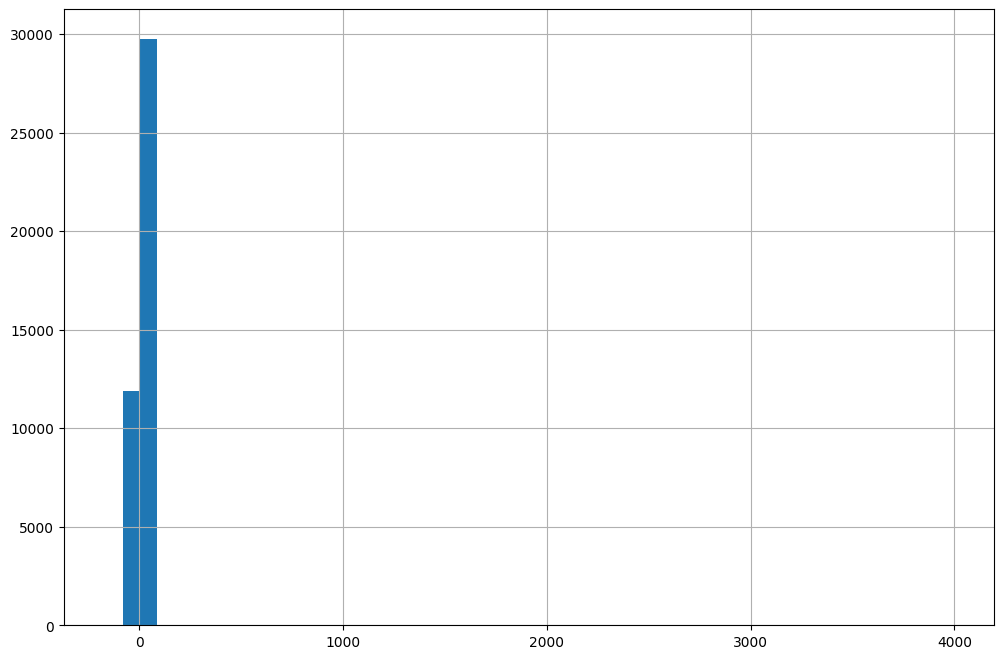

In [63]:
# Distribution of these differences
diff_df.difference.hist(bins= 50, figsize=(12,8));

In [64]:
# Looking at outliers etc.
diff_df.difference.describe()

count   41701.00
mean        4.47
std        26.05
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

In [65]:
# Delete outliers
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[(diff_df["difference"] >= (Q1 - 1.5*IQR)) & (diff_df["difference"] <= (Q3 + 1.5*IQR))]
diff_no_outliers_df

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
...,...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99,4.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98,4.99
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98,4.99
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97,4.99


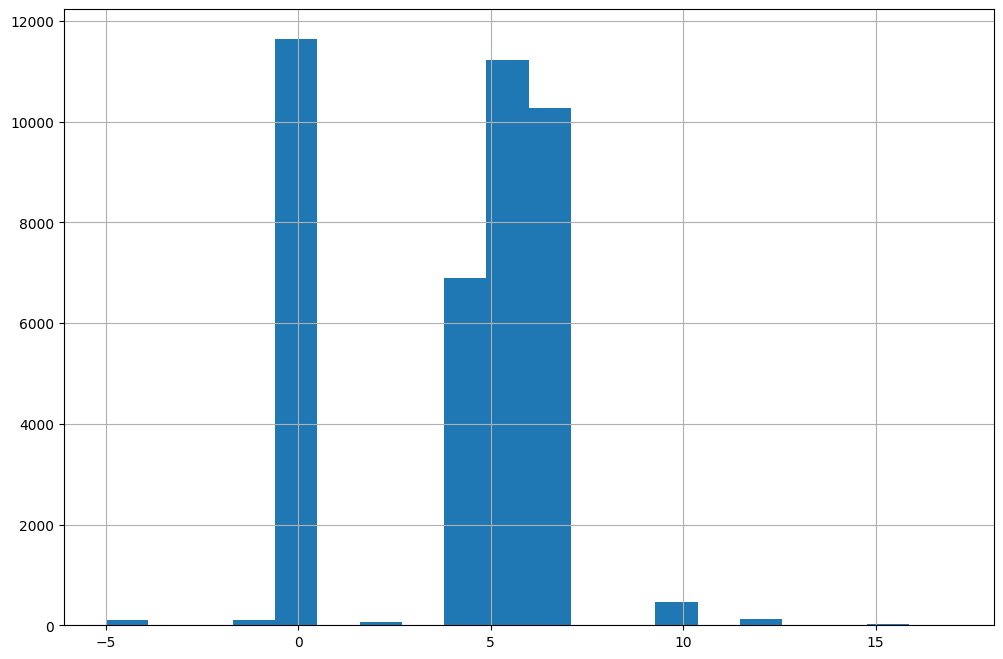

In [ ]:
diff_no_outliers_df.difference.hist(bins= 20, figsize=(12,8));

In [66]:
# Delete outliers from orders_qu and orderlines_qu
normal_diff_list = list(diff_no_outliers_df["order_id"].unique())

orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["id_order"].isin(normal_diff_list), :]

In [67]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(40985, 40985)

# How should products be classified into different categories to simplify reports and analysis?

In [68]:
# see products table cleaning

# What is the distribution of product prices across different categories?


In [70]:
category_type_df.groupby("category")[["price"]].mean().sort_values(by="price", ascending = False).head(10).rename(columns={"price" : "avg_price"})

,avg_price
category,
"MacBook, iMac",3506.55
Servers,1203.41
External Storage,751.52
Graphic Tablet,661.61
Smartwatch,545.04
Smartphone,518.09
Monitor,512.68
Others,420.42
SSD,385.56


# What are the most sold products?

In [71]:
orderlines_qu.groupby("sku")[["product_quantity"]].sum().sort_values(by="product_quantity", ascending=False).head(10)

,product_quantity
sku,
APP1190,955
APP0698,820
APP1922,537
APP0927,489
WDT0183,476
SAM0074,329
CRU0051,328
APP2446,270
NTE0013,252


In [96]:
ol_p_no_outliers_df.groupby("category")[["product_quantity"]].sum().sort_values(by="product_quantity", ascending=False).head(20)

,product_quantity
category,
Others,17923
Phone Cases,5411
External Storage,4034
Memory,3668
SSD,2504
Internal Storage,2479
Smartphone,2414
"Port, Adapter",2012
Lightning to USB Cable,1910


In [97]:
ol_p_no_outliers_df.groupby("category")[["revenue"]].sum().sort_values(by="revenue", ascending=False).head(20)

KeyError: ignored

In [73]:
# To which category do these products belong?
category_type_df
category_type_df.query("sku == 'APP1190' | sku == 'APP0698' | sku == 'APP1922' | sku == 'APP0927' | sku == 'WDT0183' | sku == 'SAM0074' | sku == 'CRU0051' | sku == 'APP2446' | sku == 'NTE0013' | sku == 'CRU0050'")

,sku,name,desc,price,promo_price,in_stock,type,short_brand,category
300,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1.259.937,1,12655397,WDT,Internal Storage
312,NTE0013,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,26.99,199.904,1,12755395,NTE,Others
845,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1,1230,APP,Lightning to USB Cable
1464,SAM0074,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,179.99,1.349.937,1,12215397,SAM,SSD
1817,APP0927,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,13.99,1,5384,APP,Others
3150,APP1190,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,609.997,1,1231,APP,Others
13018,CRU0051,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,1.449.943,0,12215397,CRU,SSD
13675,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1.610.001,1,5384,APP,Others
15065,CRU0050,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,909.944,0,12215397,CRU,SSD
17250,APP2446,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,3.820.006,0,21561716,APP,Smartphone


# What are the products that generate the most revenue?

In [74]:
orderlines_qu_copy.groupby("sku")[["unit_price_total"]].sum().sort_values(by="unit_price_total", ascending=False).head(10)

,unit_price_total
sku,
LGE0044,136270.35
APP2446,104560.64
APP1922,89419.24
APP2477,86624.52
APP1970,81608.03
APP2072,75764.89
APP2485,73678.87
WDT0183,66040.91
APP2483,60824.79


In [75]:
# To which category do they belong?
category_type_df
category_type_df.query("sku == 'LGE0044' | sku == 'APP2446' | sku == 'APP1922' | sku == 'APP2477' | sku == 'APP1970' | sku == 'APP2072' | sku == 'APP2485' | sku == 'WDT0183' | sku == 'APP2483' | sku == 'APP2479'")

,sku,name,desc,price,promo_price,in_stock,type,short_brand,category
300,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1.259.937,1,12655397,WDT,Internal Storage
13382,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.00,5.599.892,1,1296,LGE,Monitor
13675,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1.610.001,1,5384,APP,Others
15600,APP1970,Apple iPhone 32GB Space Gray,New iPhone SE with 4-inch screen 32 free GB.,419.00,3.589.997,0,51601716,APP,Smartphone
16720,APP2072,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",laptop MacBook Air 13 inch i5 18GHz 8GB RAM an...,1105.59,9.690.043,1,"2,17E+11",APP,Others
17250,APP2446,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,3.820.006,0,21561716,APP,Smartphone
17473,APP2477,Apple iPhone 64GB Space Gray 8,Apple iPhone 64GB 8 Color Space Gray,809.00,7.930.001,1,113291716,APP,Smartphone
17475,APP2479,Apple iPhone 64GB Gold 8,Apple iPhone 64GB 8 in Gold,809.00,7.930.001,1,113291716,APP,Smartphone
17478,APP2483,Apple iPhone 8 Plus 64GB Space Gray,Apple iPhone 8 Plus 64GB Space Gray,919.00,899.001,1,113281716,APP,Smartphone
17480,APP2485,Apple iPhone 8 Plus 64GB Gold,Apple iPhone 8 Plus 64GB Gold color,919.00,899.001,0,113281716,APP,Smartphone


# How big are the offered discounts as a percentage of the product prices

In [76]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.2+ MB


In [77]:
# Merge orderlines_qu and products_cl
ol_p= orderlines_qu.merge(
    category_type_df,
    on="sku",
    how="inner"
)
ol_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              53231 non-null  object        
 8   desc              53228 non-null  object        
 9   price             53231 non-null  float64       
 10  promo_price       53231 non-null  object        
 11  in_stock          53231 non-null  int64         
 12  type              53220 non-null  object        
 13  short_brand       53231 non-null  object        
 14  category          5323

In [78]:
# Add a column Discount
ol_p["Discount"] = (ol_p["price"] - ol_p["unit_price"]).round()
ol_p.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00


In [79]:
# Add a column Discount_%
ol_p["Discount_%"] = (ol_p["Discount"] * 100 / ol_p["price"]).round()
ol_p.head(30)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00
5,1129468,302293,0,5,OWC0100,49.99,2017-01-04 09:32:44,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00
6,1132204,303599,0,1,OWC0100,49.99,2017-01-06 13:20:43,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00
7,1134856,296253,0,1,OWC0100,49.99,2017-01-08 12:11:12,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00
8,1137101,305687,0,1,OWC0100,49.99,2017-01-09 13:18:35,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00
9,1142486,307908,0,1,OWC0100,49.99,2017-01-12 12:23:49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00


In [80]:
# Which products have the biggest discount_%?
ol_p.groupby(["sku", "name", "category"])[["Discount_%"]].mean().round().sort_values(by="Discount_%", ascending = False).head(50)

,,,Discount_%
sku,name,category,
MOP0108,Mophie Powerstation Mini Universal 4000mAh Battery Plus Gold,External Battery,90.00
MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini Universal Space Gray,External Battery,90.00
MOP0109,Mophie Powerstation Mini Universal 4000mAh Battery Plus Rose Gold,External Battery,89.00
MOP0106,Mophie Powerstation 6000mAh battery Universal Plus Gold,External Battery,89.00
MOP0105,Mophie Powerstation 6000mAh battery Universal Plus Rose Gold,External Battery,89.00
AP20124,Like new - Apple iPad Camera Connection Kit,Others,86.00
GRT0459,Griffin Survivor Case Journey iPhone 6 Plus and 6s Plus Black / Blue,Phone Cases,84.00
NTE0039-A,Open - KX NuGuard NewerTech iPhone Case SE / 5s / 5 Black,Phone Cases,84.00
LIF0038-A,Open - LifeProof Fre Waterproof Case iPhone 6 Rosa,Need to be categorised,84.00


In [81]:
# Which are the categories with the most offered avg. discount?
ol_p.groupby(["category"])[["Discount_%"]].mean().round().sort_values(by="Discount_%", ascending = False).head(10).rename(columns={"Discount_%" : "avg_Discount_%"})

,avg_Discount_%
category,
External Battery,46.00
Lightning to USB Cable,42.00
"Bag, Backpack",38.00
"Surveillance, Security Camera",37.00
Need to be categorised,34.00
Keyboard,31.00
MacBook Cases,31.00
Phone Cases,31.00
Smartwatch Accessoires,24.00


# How many products are being discounted?

In [82]:
ol_p.info()          # All?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              53231 non-null  object        
 8   desc              53228 non-null  object        
 9   price             53231 non-null  float64       
 10  promo_price       53231 non-null  object        
 11  in_stock          53231 non-null  int64         
 12  type              53220 non-null  object        
 13  short_brand       53231 non-null  object        
 14  category          5323

In [83]:
sum(ol_p.Discount > 0), sum(ol_p.Discount <= 0)

(49164, 4067)

49164 discounted products

In [ ]:
# ol_p.query("(Discount == 0) | Discount < 0").count()

In [84]:
ol_p.Discount.describe()

count   53231.00
mean       26.12
std        45.54
min      -171.00
25%         5.00
50%        15.00
75%        31.00
max      1320.00
Name: Discount, dtype: float64

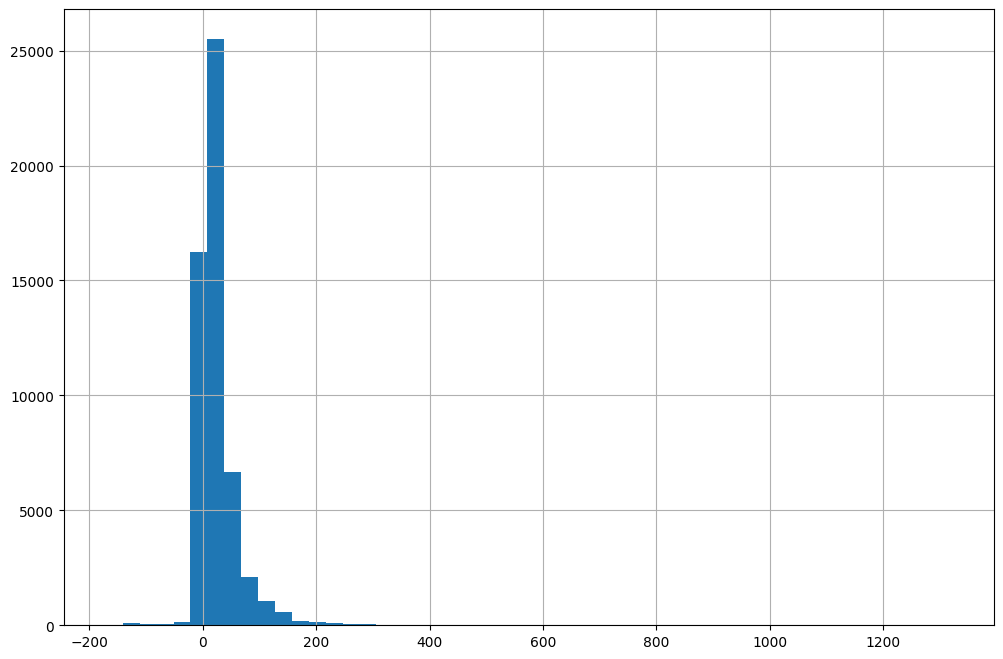

In [85]:
ol_p.Discount.hist(bins= 50, figsize=(12,8));

#Deleting outliners
Discounts between 5 euros and 31 euros\
There's a rule of thumb, that anything:
+ lower than the 25% quartile - (1.5 x interquartile range), or
+ higher than the 75% quartile + (1.5 x interquartile range)

In [86]:
# calculate the quartiles
Q1 = ol_p["Discount"].quantile(0.25)
Q3 = ol_p["Discount"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
ol_p_no_outliers_df = ol_p.loc[(ol_p["Discount"] >= (Q1 - 1.5*IQR)) & (ol_p["Discount"] <= (Q3 + 1.5*IQR))]

In [87]:
# ol_p_no_outliers_df = ol_p.loc[~((ol_p_no_outliers_df["category"] == "Others") & (ol_p_no_outliers_df["category"] == "Other Hardware"))]

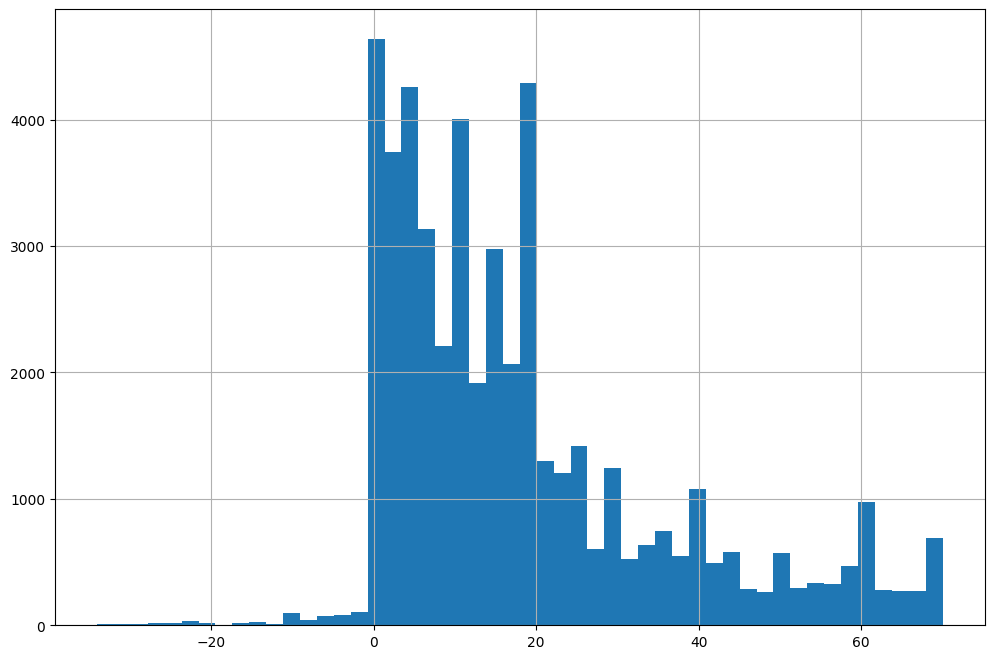

In [88]:
ol_p_no_outliers_df.Discount.hist(bins= 50, figsize=(12,8));

In [89]:
ol_p_no_outliers_df.Discount.describe()

count   49232.00
mean       18.32
std        17.60
min       -34.00
25%         5.00
50%        14.00
75%        25.00
max        70.00
Name: Discount, dtype: float64

# General numbers

In [90]:
ol_p_no_outliers_df[["Discount_%"]].mean()

Discount_%   20.94
dtype: float64

In [192]:
ol_p_no_outliers_df[["revenue"]].mean()

revenue   123.14
dtype: float64

In [99]:
ol_p_no_outliers_df.query("short_brand == 'AP2' | short_brand == 'CAD' | short_brand == 'KEN' | short_brand == 'MUJ' | short_brand == 'OTR'")[["Discount_%"]].mean()

Discount_%   28.80
dtype: float64

In [100]:
ol_p_no_outliers_df.query("short_brand == 'APP' | short_brand == 'BOS' | short_brand == 'JYB' | short_brand == 'MOP' | short_brand == 'STA'")[["Discount_%"]].mean()

Discount_%   17.15
dtype: float64

In [101]:
ol_p_no_outliers_df.query("short_brand == 'ENV' | short_brand == 'LIB'")[["Discount_%"]]#.mean()

,Discount_%


In [102]:
# Products with highest amount
ol_p_no_outliers_df.groupby("sku")[["Discount_%"]].mean().round().sort_values(by="Discount_%", ascending = False).head(10)

,Discount_%
sku,
MOP0108,90.00
MOP0107,90.00
MOP0109,89.00
AP20124,86.00
NTE0039-A,84.00
GRT0459,84.00
LIF0038-A,84.00
GRT0465,84.00
GRT0464,84.00


In [ ]:
# What is the distribution of product prices across different brands?
ol_p_no_outliers_df.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("long")[["price"]].mean().round().sort_values(by="price", ascending = False)


In [104]:
#Brands with highest sold product quantity
ol_p_no_outliers_df.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("long")[["product_quantity"]].sum().round().sort_values(by="product_quantity", ascending = False)


,product_quantity
long,
Apple,10238
OWC,3486
Belkin,2279
Western Digital,2200
LaCie,2042
Crucial,1986
Satechi,1824
NewerTech,1648
Wacom,1562


In [137]:
#Adding revenue column
ol_p_no_outliers_df['revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']
ol_p_no_outliers_df

<ipython-input-137-85a50c7f1945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_p_no_outliers_df['revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%,revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00,47.49
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00,47.49
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53225,1647125,525925,0,1,GRT0371-A,35.09,2018-03-12 13:37:34,Open - Griffin Survivor All-Terrain iPad Mini ...,Reconditioned Case iPad Mini 4 ultra resistant...,59.99,35.09,0,12635403,GRT,Phone Cases,25.00,42.00,35.09
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,404.987,0,1334,NET,"Router, Switch, Repeater",25.00,6.00,404.99
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,839.897,1,1405,WAC,Graphic Tablet,15.00,15.00,83.99
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,839.897,1,1405,WAC,Graphic Tablet,15.00,15.00,83.99


In [138]:
# Brands with highest revenue
ol_p_no_outliers_df.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("long")[["revenue"]].sum().round().sort_values(by="revenue", ascending = False)


,revenue
long,
Apple,2033663.00
LaCie,408822.00
Western Digital,308757.00
OWC,307848.00
LG,259413.00
Crucial,246025.00
Pack,233718.00
Wacom,173768.00
Synology,170210.00


In [139]:
# ooking at products from brand with second highest revenue
ol_p_no_outliers_df.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).query("long == 'LaCie'")

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%,revenue,short,long
1675,1119653,299808,0,1,LAC0181,134.89,2017-01-01 17:21:43,LaCie Porsche Design Mobile Hard Drive 2TB USB...,2TB External Hard Drive USB-C and USB 3.0 conn...,134.99,999.944,1,11935397,LAC,External Storage,0.00,0.00,134.89,LAC,LaCie
1676,1172486,320494,0,1,LAC0181,128.99,2017-02-06 14:16:26,LaCie Porsche Design Mobile Hard Drive 2TB USB...,2TB External Hard Drive USB-C and USB 3.0 conn...,134.99,999.944,1,11935397,LAC,External Storage,6.00,4.00,128.99,LAC,LaCie
1677,1172923,320682,0,1,LAC0181,128.99,2017-02-06 21:32:43,LaCie Porsche Design Mobile Hard Drive 2TB USB...,2TB External Hard Drive USB-C and USB 3.0 conn...,134.99,999.944,1,11935397,LAC,External Storage,6.00,4.00,128.99,LAC,LaCie
1678,1173138,320780,0,1,LAC0181,128.99,2017-02-07 08:49:01,LaCie Porsche Design Mobile Hard Drive 2TB USB...,2TB External Hard Drive USB-C and USB 3.0 conn...,134.99,999.944,1,11935397,LAC,External Storage,6.00,4.00,128.99,LAC,LaCie
1679,1174632,321470,0,1,LAC0181,128.99,2017-02-08 20:14:48,LaCie Porsche Design Mobile Hard Drive 2TB USB...,2TB External Hard Drive USB-C and USB 3.0 conn...,134.99,999.944,1,11935397,LAC,External Storage,6.00,4.00,128.99,LAC,LaCie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48359,1649106,526843,0,1,LAC0206-A,108.23,2018-03-14 10:39:18,Open - LaCie Porsche Design Desktop Lightgrey ...,External Hard Drive Refurbished 35 inches 4TB ...,139.99,1.082.299,0,11935397,LAC,External Storage,32.00,23.00,108.23,LAC,LaCie
48529,1588160,501352,0,1,LAC0149-A,109.66,2018-01-29 18:17:15,Open - LaCie Rugged Mini USB 3.0 2TB Mac and PC,Hard Drive 2TB portable wireless ultra-resista...,139.99,109.661,0,1298,LAC,Need to be categorised,30.00,21.00,109.66,LAC,LaCie
48572,1592183,502140,0,1,LAC0227-A,148.16,2018-01-31 13:38:55,Open - LaCie Porsche Design Desktop Drive 6TB ...,External Hard Drive Refurbished 35-inch 6TB US...,199.99,1.451.078,0,11935397,LAC,External Storage,52.00,26.00,148.16,LAC,LaCie
48575,1593037,493441,0,1,LAC0180-A,110.83,2018-01-31 18:39:40,Open - 1TB LaCie Rugged USB 3.0 Thunderbolt,portable hard Thunderbolt and USB 3.0 Mac and ...,159.99,1.108.329,0,11935397,LAC,External Storage,49.00,31.00,110.83,LAC,LaCie


In [140]:
# Revenue
ol_p_no_outliers_df["revenue"].sum()

6062258.159999999

In [141]:
ol_p_no_outliers_df.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    )

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%,revenue,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00,47.49,OWC,OWC
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00,47.49,OWC,OWC
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99,OWC,OWC
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99,OWC,OWC
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99,OWC,OWC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49227,1647125,525925,0,1,GRT0371-A,35.09,2018-03-12 13:37:34,Open - Griffin Survivor All-Terrain iPad Mini ...,Reconditioned Case iPad Mini 4 ultra resistant...,59.99,35.09,0,12635403,GRT,Phone Cases,25.00,42.00,35.09,GRT,Griffin
49228,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,404.987,0,1334,NET,"Router, Switch, Repeater",25.00,6.00,404.99,NaN,NaN
49229,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,839.897,1,1405,WAC,Graphic Tablet,15.00,15.00,83.99,WAC,Wacom
49230,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,839.897,1,1405,WAC,Graphic Tablet,15.00,15.00,83.99,WAC,Wacom


In [142]:
ol_p_no_outliers_df.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("long").agg({"product_quantity" : "sum", "unit_price" : "mean", "Discount" : "mean"}).sort_values(by="product_quantity", ascending = False).rename(columns={"product_quantity" : "sold_product_quantity", "unit_price" : "avg_unit_price", "Discount" : "avg_Discount"}).head(10)

,sold_product_quantity,avg_unit_price,avg_Discount
long,,,
Apple,10238,211.04,18.77
OWC,3486,91.32,20.77
Belkin,2279,31.47,13.57
Western Digital,2200,140.41,28.52
LaCie,2042,202.32,23.62
Crucial,1986,129.77,18.42
Satechi,1824,41.07,14.32
NewerTech,1648,55.70,23.79
Wacom,1562,115.01,25.29


In [143]:
# Preparation for graphs
delete_cat = ["Others", "Need to be categorised"]
ol_p_no_outliers_df_nogen_cat = ol_p_no_outliers_df[~ol_p_no_outliers_df['category'].isin(delete_cat)]

In [144]:
# Categories with most sold product quantities
ol_p_no_outliers_df_nogen_cat.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("category").agg({"product_quantity" : "sum", "revenue" : "sum", "Discount_%" : "mean"}).sort_values(by="product_quantity", ascending = False).rename(columns={"product_quantity" : "sold_product_quantity", "Discount_%" : "avg_Discount_%"}).head(11)

,sold_product_quantity,revenue,avg_Discount_%
category,,,
Phone Cases,5411,166374.32,31.11
External Storage,4034,606678.19,15.96
Memory,3668,338550.93,13.47
SSD,2504,417314.16,13.95
Internal Storage,2479,300311.49,17.59
Smartphone,2414,866966.27,14.77
"Port, Adapter",2012,109311.19,22.95
Lightning to USB Cable,1910,24414.66,41.63
Keyboard,1488,92580.79,30.99


In [145]:
# Categories with highest revenues
cat_high_rev = ol_p_no_outliers_df_nogen_cat.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("category").agg({"revenue" : "sum", "Discount_%" : "mean"}).sort_values(by="revenue", ascending = False).rename(columns={"Discount_%" : "avg_Discount_%"}).head(10)
cat_high_rev

,revenue,avg_Discount_%
category,,
Smartphone,866966.27,14.77
External Storage,606678.19,15.96
Monitor,419761.90,9.47
SSD,417314.16,13.95
Servers,342065.30,5.85
Memory,338550.93,13.47
Internal Storage,300311.49,17.59
Smartwatch,197499.83,2.41
Phone Cases,166374.32,31.11


In [146]:
cat_high_rev.reset_index(level=0, inplace=True)
cat_high_rev.rename(columns={'index': 'category_id'}, inplace=True)
cat_high_rev

,category,revenue,avg_Discount_%
0,Smartphone,866966.27,14.77
1,External Storage,606678.19,15.96
2,Monitor,419761.90,9.47
3,SSD,417314.16,13.95
4,Servers,342065.30,5.85
5,Memory,338550.93,13.47
6,Internal Storage,300311.49,17.59
7,Smartwatch,197499.83,2.41
8,Phone Cases,166374.32,31.11
9,Graphic Tablet,152627.00,20.36


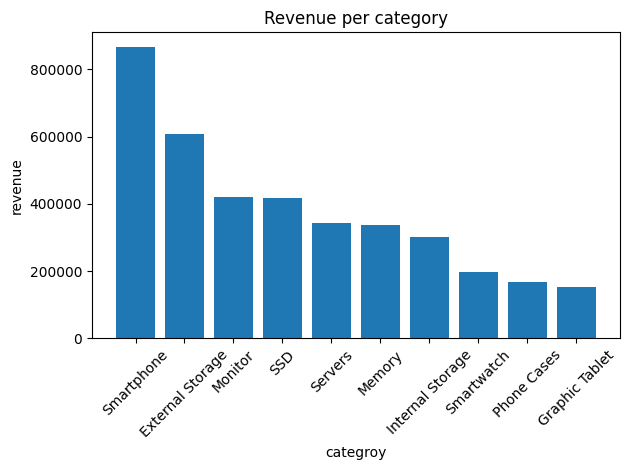

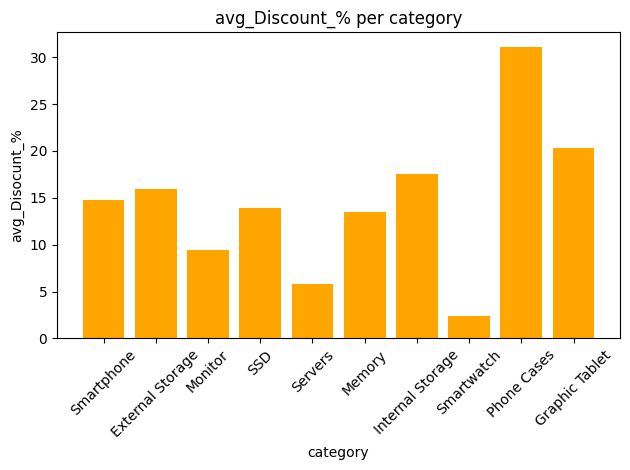

In [147]:

plt.bar(cat_high_rev['category'], cat_high_rev['revenue'])

plt.xlabel('categroy')

plt.ylabel('revenue')

plt.title('Revenue per category')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



plt.bar(cat_high_rev['category'], cat_high_rev['avg_Discount_%'], color = "orange")


plt.xlabel('category')

plt.ylabel('avg_Disocunt_%')

plt.title('avg_Discount_% per category')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
ol_p_no_outliers_df_nogen_cat.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby('category')['sku'].nunique()

category
Bag, Backpack                     28
Cable                            119
Docking Station                   59
External Battery                  47
External Storage                 276
Graphic Tablet                    37
Internal Storage                  52
Keyboard                          38
Lightning to USB Cable            57
MacBook Cases                    157
MacBook, iMac                      6
Memory                           166
Memory Card, PenDrive             84
Monitor                           94
Phone Cases                      901
Pointer                           71
Port, Adapter                    153
Repair Service                    21
Router, Switch, Repeater          73
SSD                              164
Servers                          159
Smartphone                       108
Smartwatch                        40
Smartwatch Accessoires            57
Spare Parts                       29
Speaker                           90
Surveillance, Security Camera

In [149]:
#Categories with highest discounts
ol_p_no_outliers_df_nogen_cat.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("category").agg({"revenue" : "sum", "Discount_%" : "mean"}).sort_values(by="Discount_%", ascending = False).rename(columns={"Discount_%" : "avg_Discount_%"}).head(10)

,revenue,avg_Discount_%
category,,
External Battery,15877.50,41.81
Lightning to USB Cable,24414.66,41.63
"Bag, Backpack",20054.88,37.65
MacBook Cases,28513.56,31.19
Phone Cases,166374.32,31.11
Keyboard,92580.79,30.99
Smartwatch Accessoires,12019.61,24.37
Docking Station,75857.17,23.65
"Port, Adapter",109311.19,22.95


In [150]:
cat_high_disc = ol_p_no_outliers_df_nogen_cat.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby("category").agg({"revenue" : "sum", "Discount_%" : "mean"}).sort_values(by="Discount_%", ascending = False).rename(columns={"Discount_%" : "avg_Discount_%"}).head(10)
cat_high_disc

,revenue,avg_Discount_%
category,,
External Battery,15877.50,41.81
Lightning to USB Cable,24414.66,41.63
"Bag, Backpack",20054.88,37.65
MacBook Cases,28513.56,31.19
Phone Cases,166374.32,31.11
Keyboard,92580.79,30.99
Smartwatch Accessoires,12019.61,24.37
Docking Station,75857.17,23.65
"Port, Adapter",109311.19,22.95


In [151]:
cat_high_disc.reset_index(level=0, inplace=True)
cat_high_disc.rename(columns={'index': 'category_id'}, inplace=True)
cat_high_disc

,category,revenue,avg_Discount_%
0,External Battery,15877.50,41.81
1,Lightning to USB Cable,24414.66,41.63
2,"Bag, Backpack",20054.88,37.65
3,MacBook Cases,28513.56,31.19
4,Phone Cases,166374.32,31.11
5,Keyboard,92580.79,30.99
6,Smartwatch Accessoires,12019.61,24.37
7,Docking Station,75857.17,23.65
8,"Port, Adapter",109311.19,22.95
9,"Surveillance, Security Camera",14352.80,22.10


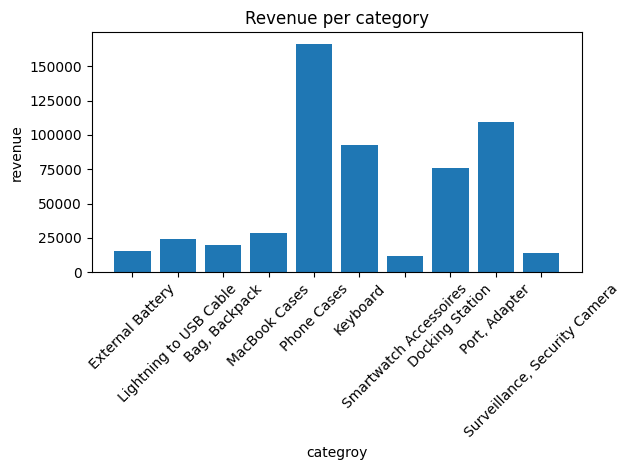

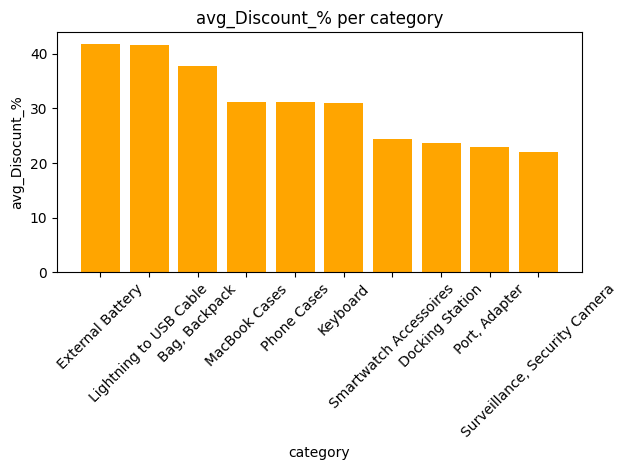

In [152]:
plt.bar(cat_high_disc['category'], cat_high_disc['revenue'])

plt.xlabel('categroy')

plt.ylabel('revenue')

plt.title('Revenue per category')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



plt.bar(cat_high_disc['category'], cat_high_disc['avg_Discount_%'], color = "orange")


plt.xlabel('category')

plt.ylabel('avg_Disocunt_%')

plt.title('avg_Discount_% per category')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [153]:
ol_p_no_outliers_df_nogen_cat.merge(
    brands_cl,
    left_on="short_brand",
    right_on="short",
    how="left"
    ).groupby('category')['sku'].nunique()

category
Bag, Backpack                     28
Cable                            119
Docking Station                   59
External Battery                  47
External Storage                 276
Graphic Tablet                    37
Internal Storage                  52
Keyboard                          38
Lightning to USB Cable            57
MacBook Cases                    157
MacBook, iMac                      6
Memory                           166
Memory Card, PenDrive             84
Monitor                           94
Phone Cases                      901
Pointer                           71
Port, Adapter                    153
Repair Service                    21
Router, Switch, Repeater          73
SSD                              164
Servers                          159
Smartphone                       108
Smartwatch                        40
Smartwatch Accessoires            57
Spare Parts                       29
Speaker                           90
Surveillance, Security Camera

In [154]:
ol_p_no_outliers_df["sku"].nunique()

4594

In [ ]:
# cat_high_rev = 2035 --> 44% aller Produkte
# cat_high_disc = 1511 --> 33%

In [193]:
ol_p_no_outliers_df.query("short_brand == 'AP2'").head(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%,revenue
38605,1253078,358317,0,6,AP20148,59.00,2017-05-23 11:13:02,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,20.00,25.00,354.00
38606,1257997,360530,0,1,AP20148,59.00,2017-05-30 11:24:19,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,20.00,25.00,59.00
38607,1258022,360543,0,1,AP20148,59.00,2017-05-30 11:43:46,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,20.00,25.00,59.00
38608,1259477,361219,0,1,AP20148,59.00,2017-06-01 12:34:56,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,20.00,25.00,59.00
38609,1300711,380198,0,2,AP20148,59.00,2017-07-24 10:46:21,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,20.00,25.00,118.00
38610,1417360,429695,0,1,AP20148,53.10,2017-11-20 22:46:25,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,26.00,33.00,53.10
38611,1417489,429759,0,1,AP20148,53.10,2017-11-20 23:21:51,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,26.00,33.00,53.10
38612,1417623,429836,0,1,AP20148,53.10,2017-11-21 00:24:58,Like new - Apple TV 3 media player,Refurbished Apple multimedia player,79.00,589.996,0,4259,AP2,Others,26.00,33.00,53.10
38940,1255375,359325,0,1,AP20147,129.00,2017-05-26 10:19:35,Like new - Apple TV 32GB media player,Refurbished Apple multimedia player,179.00,1.439.997,0,4259,AP2,Others,50.00,28.00,129.00
38941,1298524,380205,0,1,AP20147,132.99,2017-07-21 09:02:36,Like new - Apple TV 32GB media player,Refurbished Apple multimedia player,179.00,1.439.997,0,4259,AP2,Others,46.00,26.00,132.99


In [156]:
ol_p_no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49232 entries, 0 to 53230
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49232 non-null  int64         
 1   id_order          49232 non-null  int64         
 2   product_id        49232 non-null  int64         
 3   product_quantity  49232 non-null  int64         
 4   sku               49232 non-null  object        
 5   unit_price        49232 non-null  float64       
 6   date              49232 non-null  datetime64[ns]
 7   name              49232 non-null  object        
 8   desc              49229 non-null  object        
 9   price             49232 non-null  float64       
 10  promo_price       49232 non-null  object        
 11  in_stock          49232 non-null  int64         
 12  type              49225 non-null  object        
 13  short_brand       49232 non-null  object        
 14  category          4923

In [157]:
ol_p_no_outliers_df["id_order"].nunique()


37766

In [158]:
# ol_p_no_outliers_df['revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']
# ol_p_no_outliers_df

<ipython-input-158-85a50c7f1945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_p_no_outliers_df['revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%,revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00,47.49
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,14.00,23.00,47.49
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,Others,11.00,18.00,49.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53225,1647125,525925,0,1,GRT0371-A,35.09,2018-03-12 13:37:34,Open - Griffin Survivor All-Terrain iPad Mini ...,Reconditioned Case iPad Mini 4 ultra resistant...,59.99,35.09,0,12635403,GRT,Phone Cases,25.00,42.00,35.09
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,404.987,0,1334,NET,"Router, Switch, Repeater",25.00,6.00,404.99
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,839.897,1,1405,WAC,Graphic Tablet,15.00,15.00,83.99
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,839.897,1,1405,WAC,Graphic Tablet,15.00,15.00,83.99


In [159]:
# Products with highest discounts
ol_p_no_outliers_df.groupby("sku")[["Discount_%"]].mean().round().sort_values(by="Discount_%", ascending = False).head(10)

,Discount_%
sku,
MOP0108,90.00
MOP0107,90.00
MOP0109,89.00
AP20124,86.00
NTE0039-A,84.00
GRT0459,84.00
LIF0038-A,84.00
GRT0465,84.00
GRT0464,84.00


In [160]:
# Products with highest revenue
ol_p_no_outliers_df.groupby("sku")[["revenue"]].mean().round().sort_values(by="revenue", ascending = False).head(10)

,revenue
sku,
APP0911,1109.00
SYN0111,1104.00
APP2480,1094.00
APP0909,1025.00
GTE0105,1000.00
APP2118,999.00
APP2153,999.00
APP2132,997.00
APP2152,997.00


# How do seasonality and special dates (Christmas, Black Friday) affect sales?

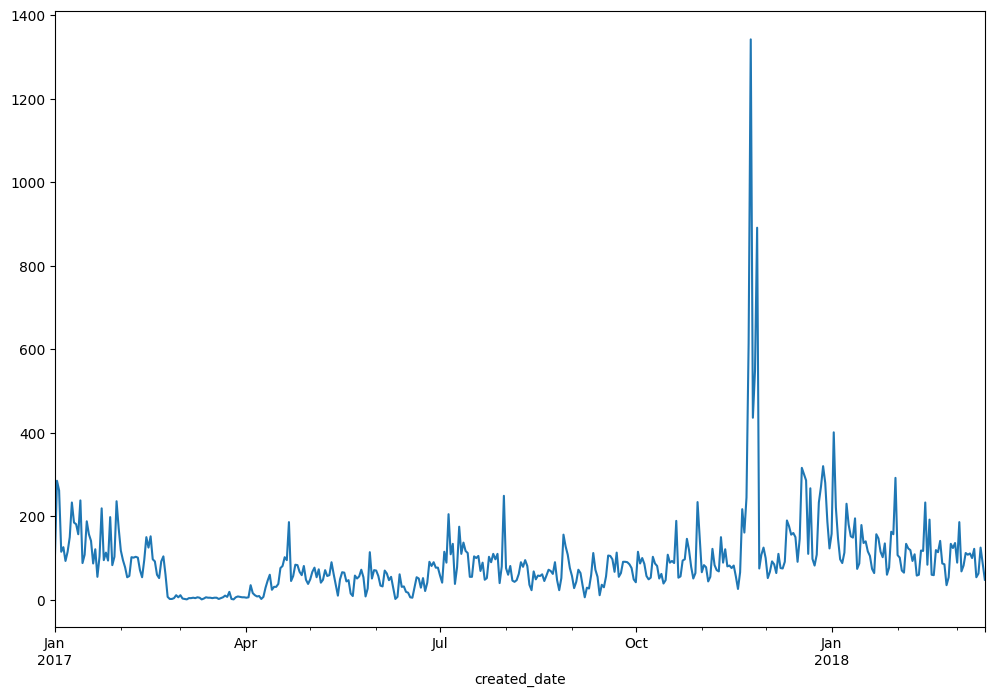

In [161]:
# amount of orders per day
(
    diff_no_outliers_df.resample("D", on="created_date")
    .count()["order_id"]
    .plot(figsize=(12, 8))
);

<ipython-input-162-4fa51b5a46ca>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["unit_price_total"]


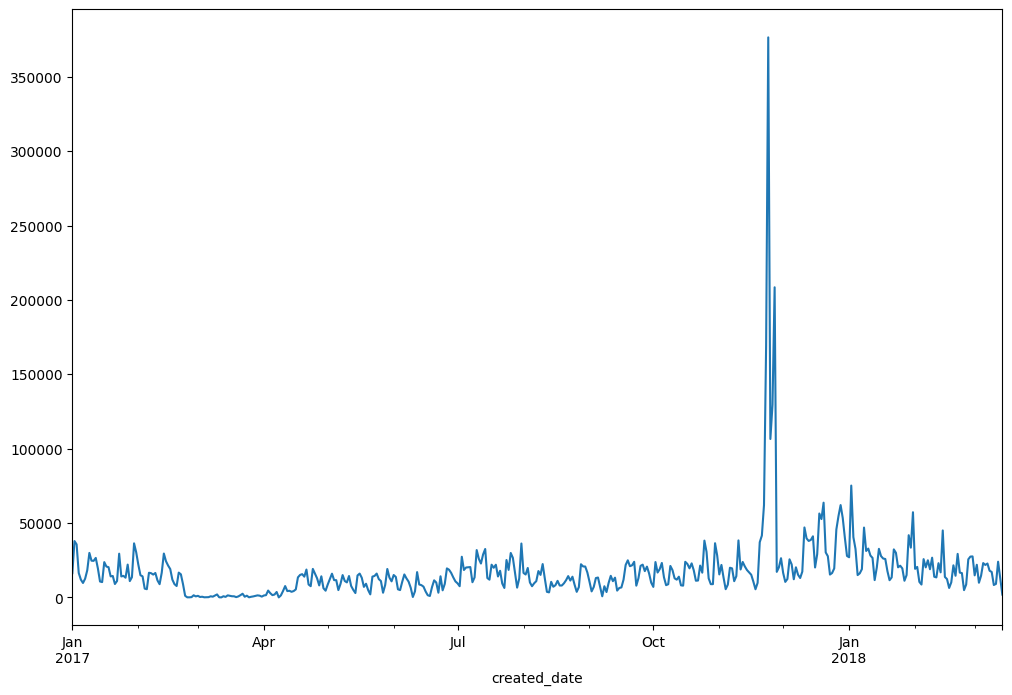

In [162]:
# total_paid per day
(
    diff_no_outliers_df.resample("D", on="created_date")
    .sum()["unit_price_total"]
    .plot(figsize=(12, 8))
);

<ipython-input-163-43b5fa59a6dd>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["Discount"]


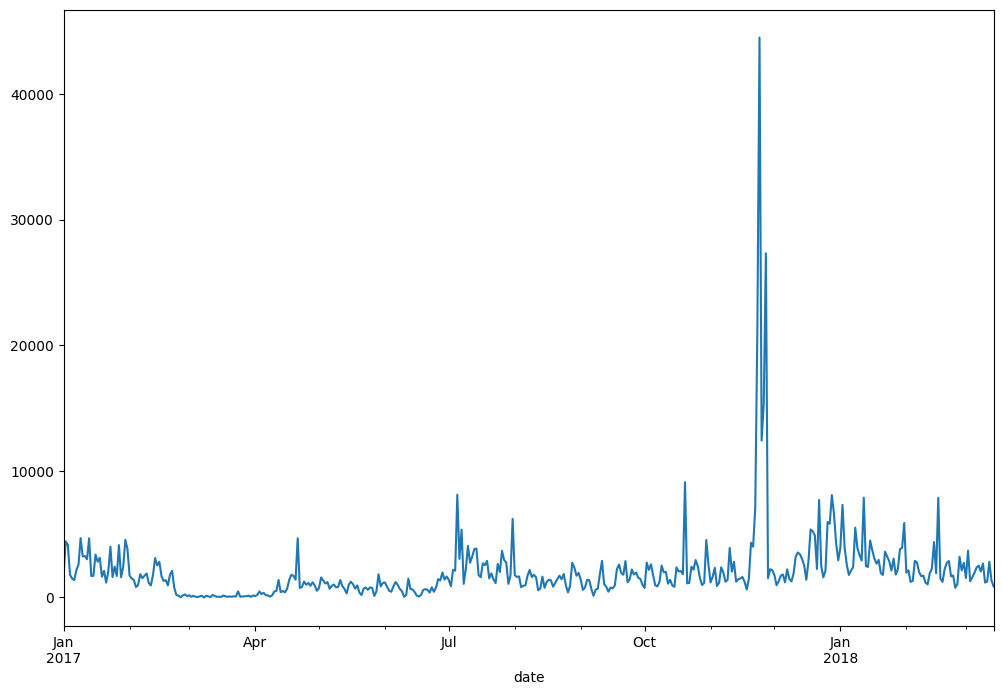

In [163]:
 # Disocunt per day
(
    ol_p_no_outliers_df.resample("D", on="date")
    .sum()["Discount"]
    .plot(figsize=(12, 8))
);

<ipython-input-164-6714d9cc543c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff_no_outliers_df.resample("D", on="created_date").sum()["unit_price_total"].plot(
<ipython-input-164-6714d9cc543c>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ol_p_no_outliers_df.resample("D", on="date").sum()["Discount"].plot(


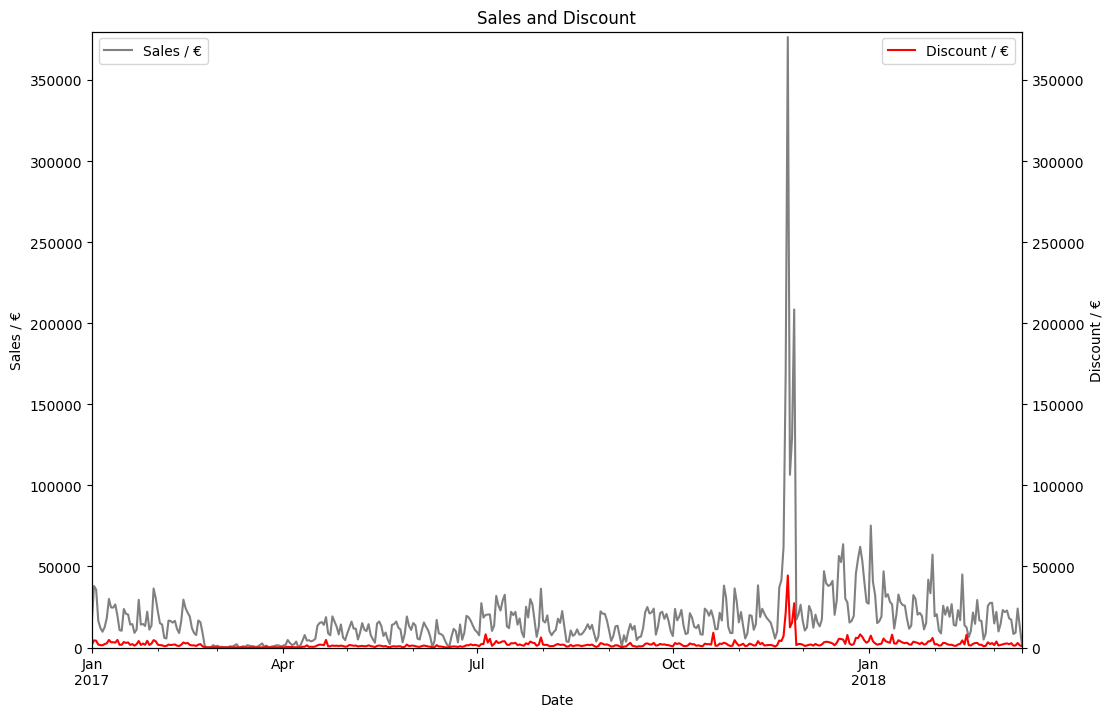

In [164]:
fig, ax1 = plt.subplots(figsize=(12, 8))
diff_no_outliers_df.resample("D", on="created_date").sum()["unit_price_total"].plot(
    kind='line', color='grey', label='Sales / €', ax=ax1
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales / €')
ax1.set_ylim([0, 380000])  # Set the y-axis limit for sales

ax2 = ax1.twinx()
ol_p_no_outliers_df.resample("D", on="date").sum()["Discount"].plot(
    kind='line', color='red', label='Discount / €', ax=ax2
)
ax2.set_ylabel('Discount / €')
ax2.set_ylim([0, 380000])  # Set the y-axis limit for discount

plt.title('Sales and Discount')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


<ipython-input-165-b5cf9e8262fe>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff_no_outliers_df.resample("D", on="created_date").sum()["unit_price_total"].plot(


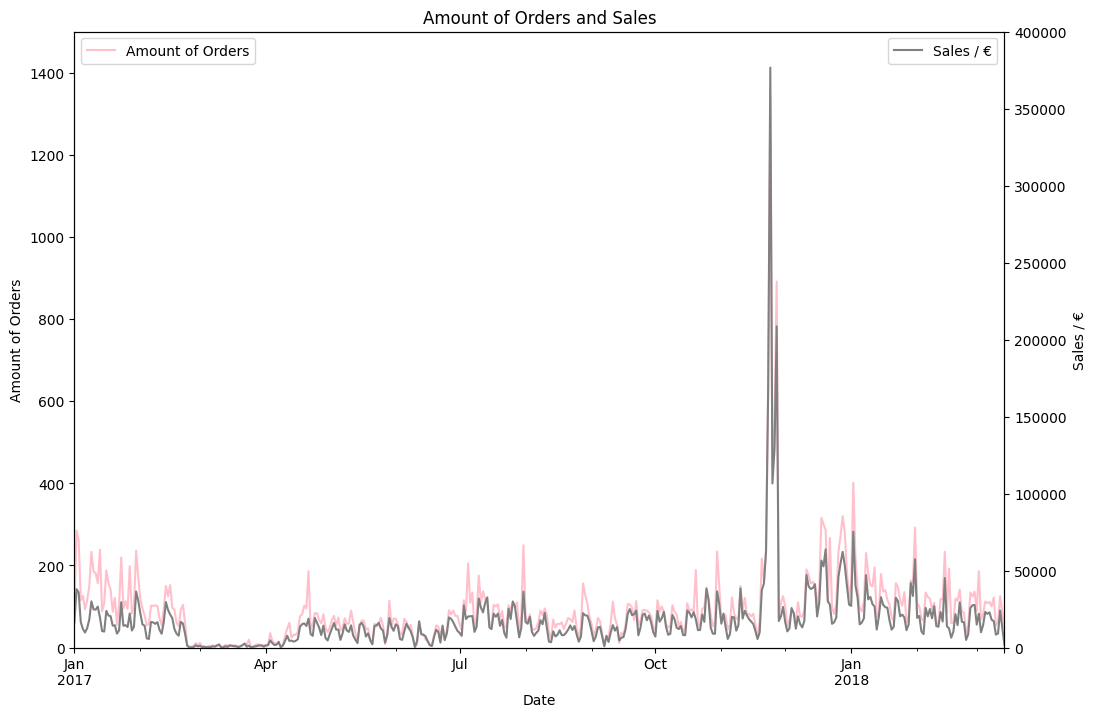

In [165]:
fig, ax1 = plt.subplots(figsize=(12, 8))
diff_no_outliers_df.resample("D", on="created_date").count()["order_id"].plot(
    kind='line', color='pink', label='Amount of Orders', ax=ax1
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Amount of Orders')
ax1.set_ylim([0, 1500])  # Set the y-axis limit for sales

ax2 = ax1.twinx()
diff_no_outliers_df.resample("D", on="created_date").sum()["unit_price_total"].plot(
    kind='line', color='grey', label='Sales / €', ax=ax2
)
ax2.set_ylabel('Sales / €')
ax2.set_ylim([0, 400000])  # Set the y-axis limit for discount

plt.title('Amount of Orders and Sales')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [167]:
# Delete time frame around peek to have a closer look at rest of the year
start_date = pd.to_datetime('2017-11-23')
end_date = pd.to_datetime('2017-11-28')

# for orders_qu
orders_qu.info()
filtered_data_o = orders_qu[(orders_qu["created_date"] < start_date) | (orders_qu["created_date"] > end_date)]
filtered_data_o.info()
 # for diff_no_outliers_df
filtered_data_d = diff_no_outliers_df[(diff_no_outliers_df["created_date"] < start_date) | (diff_no_outliers_df["created_date"] > end_date)]
 # for ol_p
filtered_data_ol = ol_p[(ol_p["date"] < start_date) | (ol_p["date"] > end_date)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40985 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid    40985 non-null  float64       
 3   state         40985 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37153 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      37153 non-null  int64         
 1   created_date  37153 non-null  datetime64[ns]
 2   total_paid    37153 non-null  float64       
 3   state         37153 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ MB


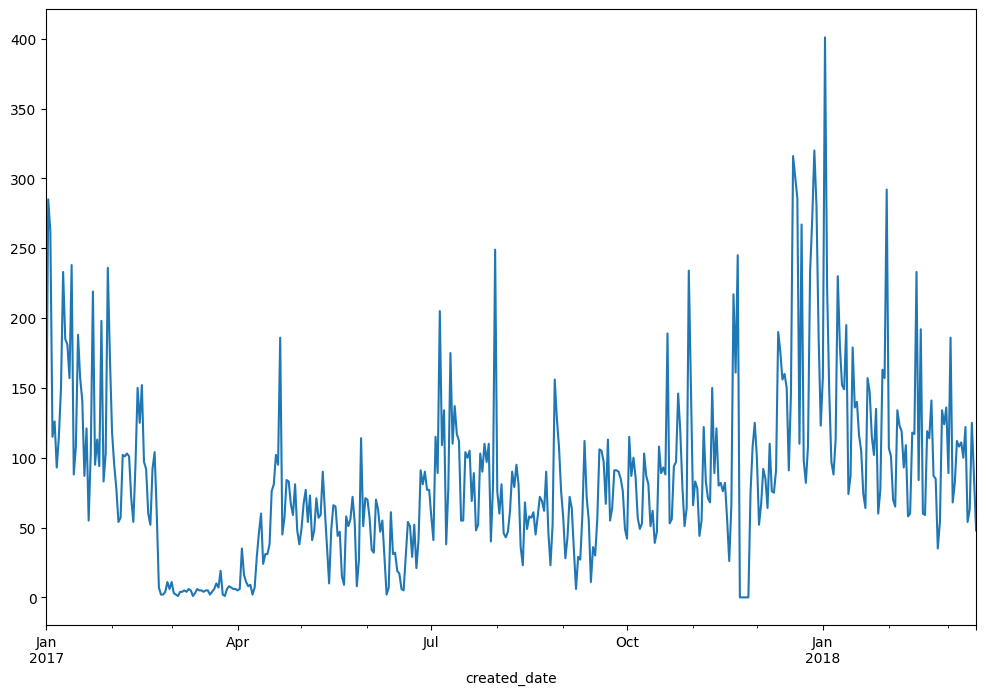

In [168]:
(
    filtered_data_o.resample("D", on="created_date")
    .count()["order_id"]
    .plot(figsize=(12, 8))
);

<ipython-input-169-b87025c5f5ec>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["unit_price_total"]


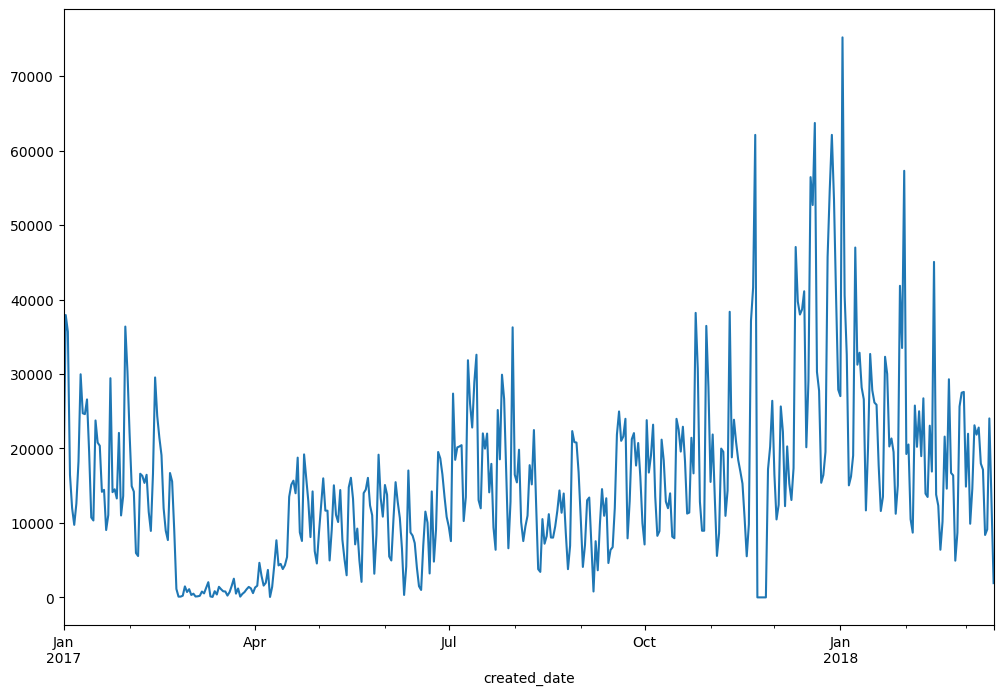

In [169]:
(
    filtered_data_d.resample("D", on="created_date")
    .sum()["unit_price_total"]
    .plot(figsize=(12, 8))
);

<ipython-input-170-a7c01cec7c35>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["Discount"]


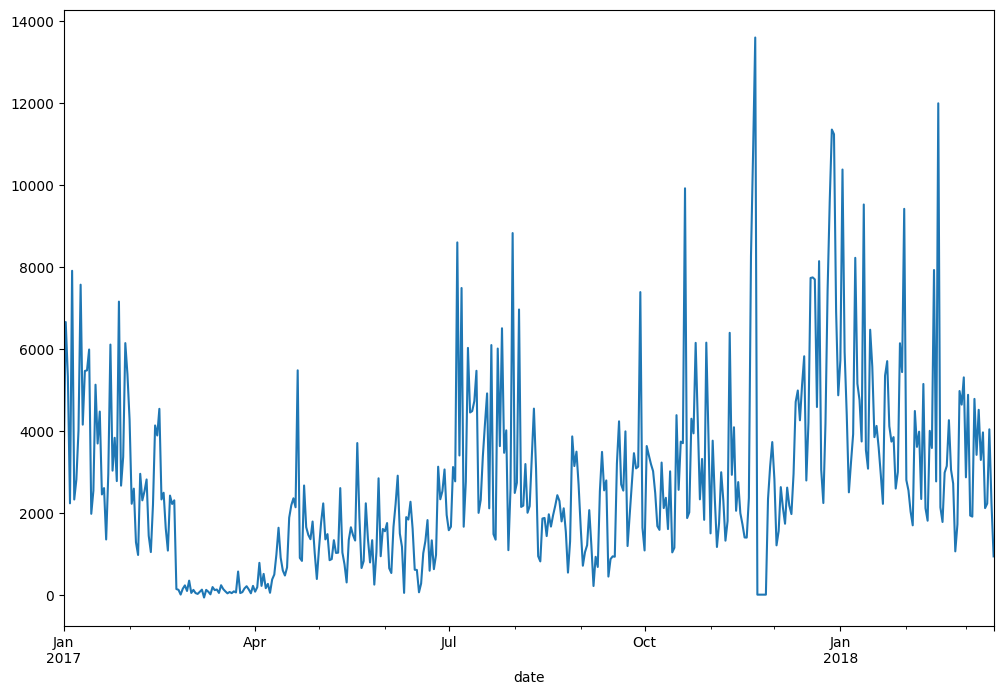

In [170]:
(
    filtered_data_ol.resample("D", on="date")
    .sum()["Discount"]
    .plot(figsize=(12, 8))
);

<ipython-input-172-80899f34c8d3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_data_d.resample("D", on="created_date").sum()["unit_price_total"].plot(
<ipython-input-172-80899f34c8d3>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_data_ol.resample("D", on="date").sum()["Discount"].plot(


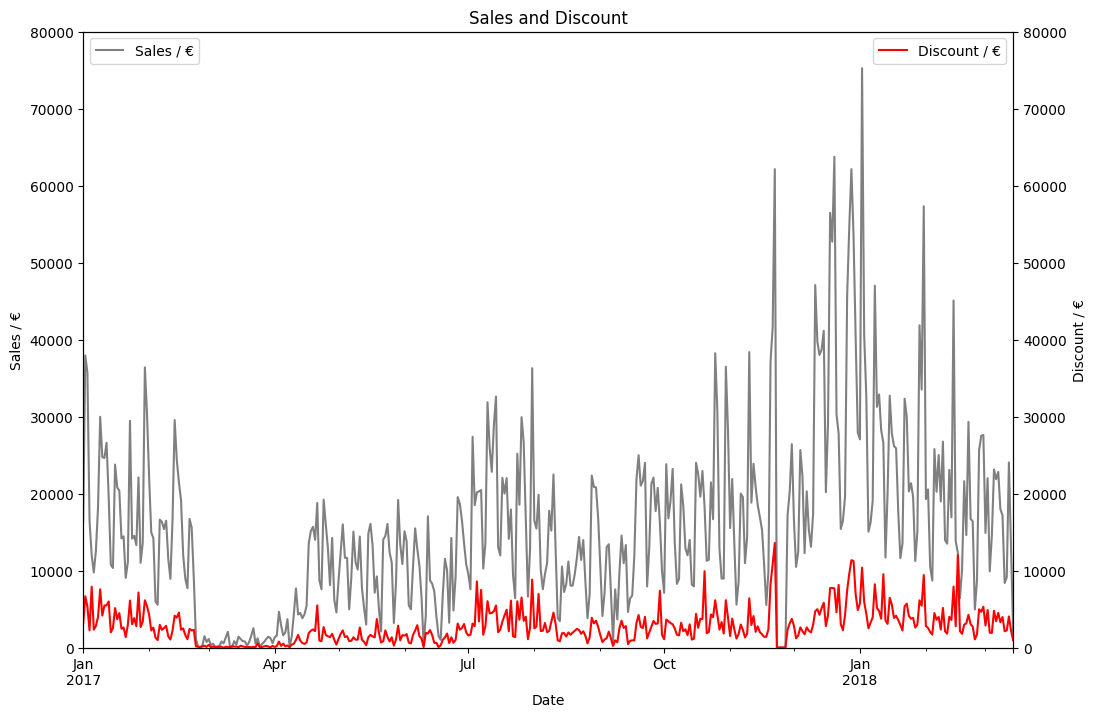

In [172]:
fig, ax1 = plt.subplots(figsize=(12, 8))
filtered_data_d.resample("D", on="created_date").sum()["unit_price_total"].plot(
    kind='line', color='grey', label='Sales / €', ax=ax1
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales / €')
ax1.set_ylim([0, 80000])  # Set the y-axis limit for sales

ax2 = ax1.twinx()
filtered_data_ol.resample("D", on="date").sum()["Discount"].plot(
    kind='line', color='red', label='Discount / €', ax=ax2
)
ax2.set_ylabel('Discount / €')
ax2.set_ylim([0, 80000])  # Set the y-axis limit for discount

plt.title('Sales and Discount')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


<ipython-input-173-5ecf449c2255>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_data_d.resample("D", on="created_date").sum()["unit_price_total"].plot(


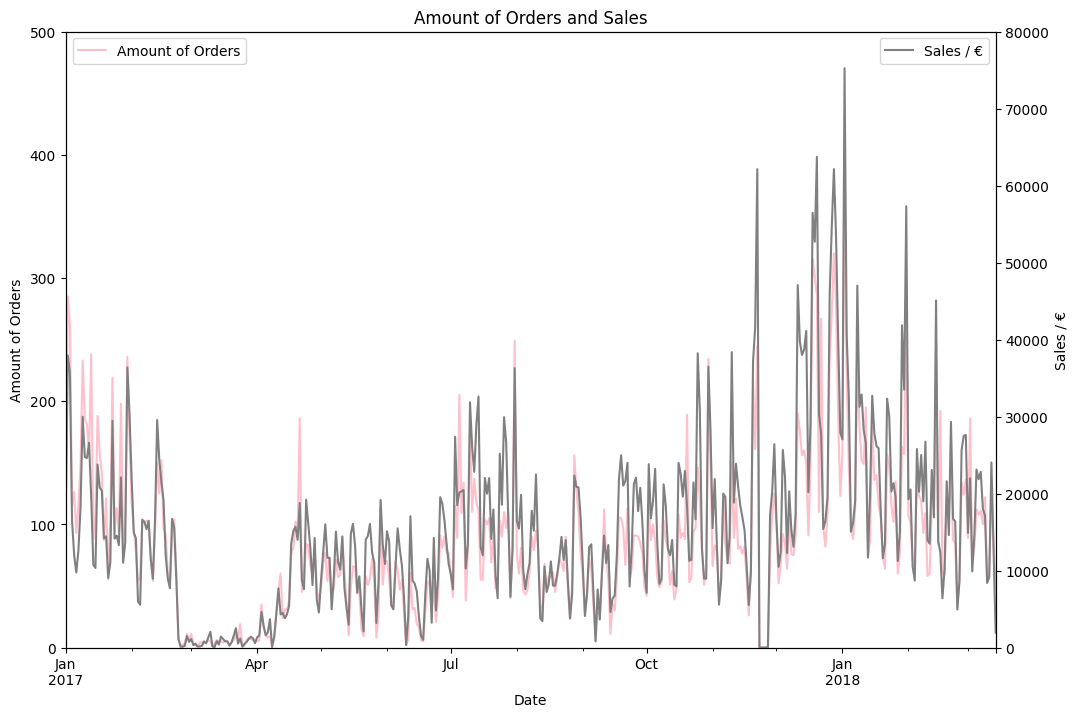

In [173]:
fig, ax1 = plt.subplots(figsize=(12, 8))
filtered_data_o.resample("D", on="created_date").count()["order_id"].plot(
    kind='line', color='pink', label='Amount of Orders', ax=ax1
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Amount of Orders')
ax1.set_ylim([0, 500])  # Set the y-axis limit for sales

ax2 = ax1.twinx()
filtered_data_d.resample("D", on="created_date").sum()["unit_price_total"].plot(
    kind='line', color='grey', label='Sales / €', ax=ax2
)
ax2.set_ylabel('Sales / €')
ax2.set_ylim([0, 80000])  # Set the y-axis limit for discount

plt.title('Amount of Orders and Sales')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


# Other Graphs

<Axes: >

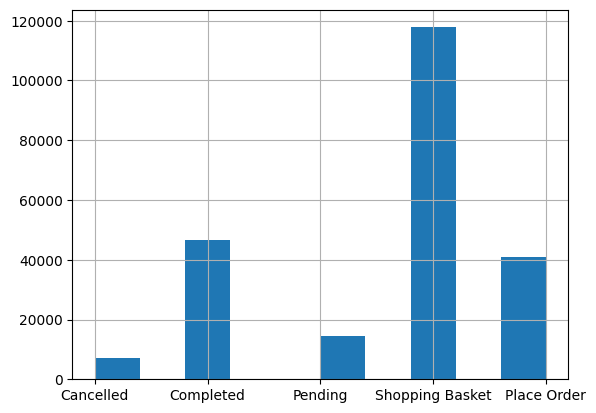

In [174]:
orders.state.hist()

# Playing around

In [175]:
ol_p_no_outliers_df.query("in_stock > 0").sort_values(by="id_order").count()

id                  29275
id_order            29275
product_id          29275
product_quantity    29275
sku                 29275
unit_price          29275
date                29275
name                29275
desc                29274
price               29275
promo_price         29275
in_stock            29275
type                29274
short_brand         29275
category            29275
Discount            29275
Discount_%          29275
revenue             29275
dtype: int64

In [176]:
ol_p_no_outliers_df.query("id_order == 527096").head(20)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%,revenue
2580,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1,1230,APP,Lightning to USB Cable,15.00,60.00,29.97


In [177]:
ol_p_no_outliers_df["id_order"].nunique()

37766

In [178]:
ol_p_no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49232 entries, 0 to 53230
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49232 non-null  int64         
 1   id_order          49232 non-null  int64         
 2   product_id        49232 non-null  int64         
 3   product_quantity  49232 non-null  int64         
 4   sku               49232 non-null  object        
 5   unit_price        49232 non-null  float64       
 6   date              49232 non-null  datetime64[ns]
 7   name              49232 non-null  object        
 8   desc              49229 non-null  object        
 9   price             49232 non-null  float64       
 10  promo_price       49232 non-null  object        
 11  in_stock          49232 non-null  int64         
 12  type              49225 non-null  object        
 13  short_brand       49232 non-null  object        
 14  category          4923

In [179]:
import pandas as pd

# Annahme: Du hast bereits den DataFrame "ol_p_no_outliers_df" mit der Spalte "id_order" erstellt.

# Gruppiere den DataFrame nach der Spalte "id_order" und erhalte die Anzahl der Zeilen für jede Gruppe
grouped_counts = ol_p_no_outliers_df.groupby('id_order').size()

# Filtere die Gruppen, bei denen die Anzahl der Zeilen größer als 1 ist
id_orders_with_multiple_rows = grouped_counts[grouped_counts > 1]

# Gebe die id_orders aus, die mehr als eine Zeile haben
print(id_orders_with_multiple_rows.index.tolist())


[251302, 253220, 253307, 254341, 254816, 258155, 259192, 262236, 263738, 265951, 266727, 268234, 269440, 274550, 280008, 281492, 281497, 284739, 288502, 290393, 294617, 296229, 296253, 296502, 297076, 298038, 298161, 299404, 299571, 299610, 299634, 299655, 299681, 299696, 299710, 299719, 299850, 299858, 299867, 299918, 299944, 299959, 300033, 300040, 300055, 300137, 300158, 300173, 300179, 300188, 300192, 300203, 300213, 300257, 300281, 300290, 300309, 300310, 300314, 300315, 300326, 300331, 300368, 300385, 300391, 300421, 300430, 300435, 300439, 300443, 300444, 300446, 300467, 300495, 300506, 300513, 300532, 300541, 300582, 300626, 300646, 300656, 300671, 300699, 300711, 300713, 300720, 300726, 300736, 300737, 300760, 300778, 300819, 300826, 300846, 300848, 300876, 300881, 300906, 300979, 300989, 301079, 301080, 301097, 301106, 301140, 301184, 301198, 301204, 301230, 301234, 301243, 301247, 301276, 301300, 301325, 301344, 301383, 301387, 301430, 301451, 301512, 301517, 301563, 301584,

In [ ]:
ol_p_no_outliers_df.query("sku == 'MOP0108' | sku == 'MOP0107' | sku == 'MOP0109' | sku == 'AP20124' | sku == 'NTE0039-A' | sku == 'GRT0459' | sku == 'LIF0038-A' | sku == 'GRT0465' | sku == 'GRT0464' | sku == 'NTE0040-A'").sort_values(by="id_order")

In [181]:
top_10_rev = ol_p_no_outliers_df.query("sku == 'LGE0044' | sku == 'APP2446' | sku == 'APP1922' | sku == 'APP2477' | sku == 'APP1970' | sku == 'APP2485' | sku == 'WDT0183' | sku == 'APP2483' | sku == 'APP2479' | sku == 'APP1190'").sort_values(by="id_order")
top_10_rev["Discount_%"].mean()

14.257369614512472

In [182]:
top_10_sold = ol_p_no_outliers_df.query("sku == 'App1190' | sku == 'APP0698' | sku == 'APP1922' | sku == 'APP0927' | sku == 'WDT0183' | sku == 'SAM0074' | sku == 'CRU0051' | sku == 'APP2446' | sku == 'NTE0013' | sku == 'CRU0050'").sort_values(by="id_order")
top_10_sold["Discount_%"].mean()

27.386131643787397

In [183]:
LGE0044 = ol_p_no_outliers_df.query("sku == 'LGE0044'").sort_values(by="date")
APP2446 = ol_p_no_outliers_df.query("sku == 'APP2446'").sort_values(by="date")
APP1922 = ol_p_no_outliers_df.query("sku == 'APP1922'").sort_values(by="date")
APP2477 = ol_p_no_outliers_df.query("sku == 'APP2477'").sort_values(by="date")
APP1970 = ol_p_no_outliers_df.query("sku == 'APP1970'").sort_values(by="date")
APP2485 = ol_p_no_outliers_df.query("sku == 'APP2485'").sort_values(by="date")
WDT0183 = ol_p_no_outliers_df.query("sku == 'WDT0183'").sort_values(by="date")
APP2483 = ol_p_no_outliers_df.query("sku == 'APP2483'").sort_values(by="date")
APP2479 = ol_p_no_outliers_df.query("sku == 'APP2479'").sort_values(by="date")
APP1190 = ol_p_no_outliers_df.query("sku == 'APP1190'").sort_values(by="date")

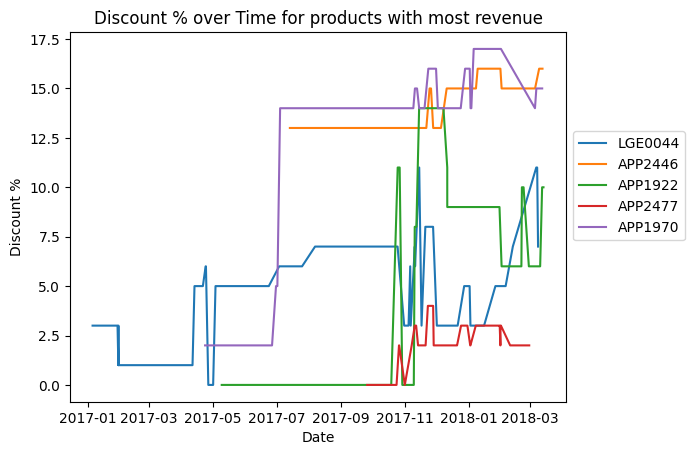

In [184]:
plt.plot(LGE0044['date'], LGE0044['Discount_%'], label='LGE0044')
plt.plot(APP2446['date'], APP2446['Discount_%'], label='APP2446')
plt.plot(APP1922['date'], APP1922['Discount_%'], label='APP1922')
plt.plot(APP2477['date'], APP2477['Discount_%'], label='APP2477')
plt.plot(APP1970['date'], APP1970['Discount_%'], label='APP1970')
# plt.plot(APP2485['date'], APP2485['Discount_%'], label='APP2485')
# plt.plot(WDT0183['date'], WDT0183['Discount_%'], label='WDT0183')
# plt.plot(APP2483['date'], APP2483['Discount_%'], label='APP2483')
# plt.plot(APP2479['date'], APP2479['Discount_%'], label='APP2479')
# plt.plot(APP1190['date'], APP1190['Discount_%'], label='APP1190')

plt.xlabel('Date')
plt.ylabel('Discount %')
plt.title('Discount % over Time for products with most revenue')
plt.legend(bbox_to_anchor=(1, 0.75))

plt.show()

In [185]:
MOP0108 = ol_p_no_outliers_df.query("sku == 'MOP0108'").sort_values(by="date")
MOP0107 = ol_p_no_outliers_df.query("sku == 'MOP0107'").sort_values(by="date")
MOP0109 = ol_p_no_outliers_df.query("sku == 'MOP0109'").sort_values(by="date")
AP20124 = ol_p_no_outliers_df.query("sku == 'AP20124'").sort_values(by="date")
NTE0039_A = ol_p_no_outliers_df.query("sku == 'NTE0039-A'").sort_values(by="date")
GRT0459 = ol_p_no_outliers_df.query("sku == 'GRT0459'").sort_values(by="date")
LIF0038_A = ol_p_no_outliers_df.query("sku == 'LIF0038-A'").sort_values(by="date")
GRT0465 = ol_p_no_outliers_df.query("sku == 'GRT0465'").sort_values(by="date")
GRT0464 = ol_p_no_outliers_df.query("sku == 'GRT0464'").sort_values(by="date")
NTE0040_A = ol_p_no_outliers_df.query("sku == 'NTE0040-A'").sort_values(by="date")

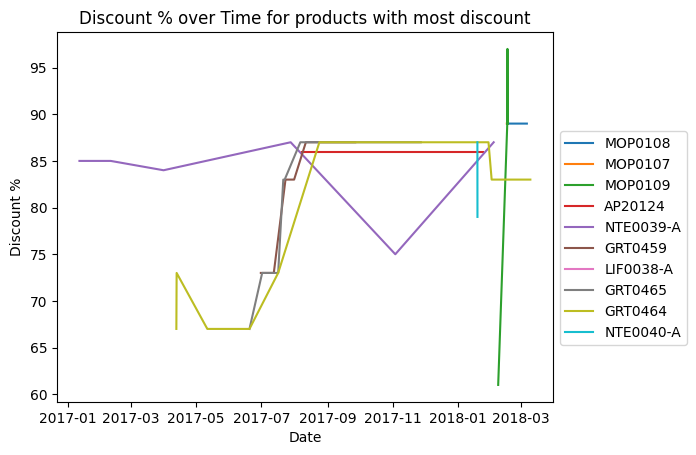

In [186]:
plt.plot(MOP0108['date'], MOP0108['Discount_%'], label='MOP0108')
plt.plot(MOP0107['date'], MOP0107['Discount_%'], label='MOP0107')
plt.plot(MOP0109['date'], MOP0109['Discount_%'], label='MOP0109')
plt.plot(AP20124['date'], AP20124['Discount_%'], label='AP20124')
plt.plot(NTE0039_A['date'], NTE0039_A['Discount_%'], label='NTE0039-A')
plt.plot(GRT0459['date'], GRT0459['Discount_%'], label='GRT0459')
plt.plot(LIF0038_A['date'], LIF0038_A['Discount_%'], label='LIF0038-A')
plt.plot(GRT0465['date'], GRT0465['Discount_%'], label='GRT0465')
plt.plot(GRT0464['date'], GRT0464['Discount_%'], label='GRT0464')
plt.plot(NTE0040_A['date'], NTE0040_A['Discount_%'], label='NTE0040-A')

plt.xlabel('Date')
plt.ylabel('Discount %')
plt.title('Discount % over Time for products with most discount')
plt.legend(bbox_to_anchor=(1, 0.75))

plt.show()

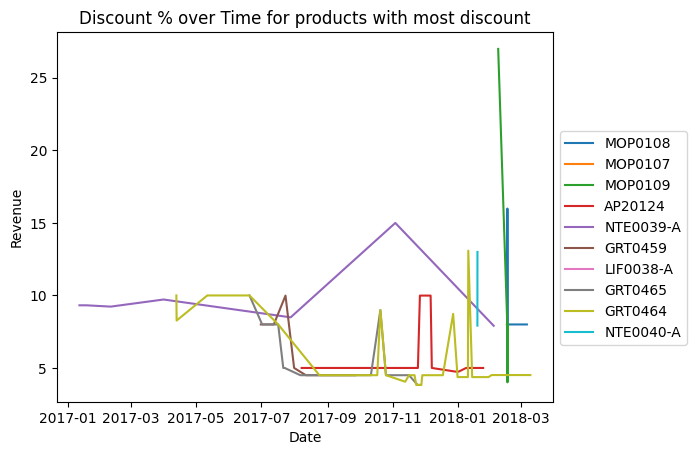

In [187]:
plt.plot(MOP0108['date'], MOP0108['revenue'], label='MOP0108')
plt.plot(MOP0107['date'], MOP0107['revenue'], label='MOP0107')
plt.plot(MOP0109['date'], MOP0109['revenue'], label='MOP0109')
plt.plot(AP20124['date'], AP20124['revenue'], label='AP20124')
plt.plot(NTE0039_A['date'], NTE0039_A['revenue'], label='NTE0039-A')
plt.plot(GRT0459['date'], GRT0459['revenue'], label='GRT0459')
plt.plot(LIF0038_A['date'], LIF0038_A['revenue'], label='LIF0038-A')
plt.plot(GRT0465['date'], GRT0465['revenue'], label='GRT0465')
plt.plot(GRT0464['date'], GRT0464['revenue'], label='GRT0464')
plt.plot(NTE0040_A['date'], NTE0040_A['revenue'], label='NTE0040-A')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Discount % over Time for products with most discount')
plt.legend(bbox_to_anchor=(1, 0.75))

plt.show()

In [188]:
ol_p_no_outliers_df.query("in_stock > 2")

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,category,Discount,Discount_%,revenue
